In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from einops import rearrange
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm


| Models | num_hidden_layer | num_attention_heads | head_dimensions |
|---------|---------|---------|---------|
| open_llama_3b  | 26  | 32   |100   |
| open_llama_7b  | 32  | 32  |128  |
| vicuna-7b-v1.3  | 32  | 32   |128  |
| dolly-v2-3b  | 32  | 32   |80  |
| dolly-v2-7b  | 32  | 32   |128  |
| dolly-v2-12b  | 36  | 32   |160  |
| Llama-2-7b-chat-hf  | 32  | 32   |128  |
| RedPajama-INCITE-Instruct-3B-v1  | 32  | 32   |80  |
| stablelm-tuned-alpha-3b  | 16  | 32   |128  |
| stablelm-tuned-alpha-7b  | 16  | 32   |192  |




In [3]:
activations = np.load("/home/liwangyue/Embeddings/features/open_llama_3b_tqa_finetune_prompt_activations.npy")
activations = rearrange(activations, 'b l (h d) -> b l h d', l= 26, h= 32)
activations.shape

(80, 26, 32, 100)

/tmp/ipykernel_912647/496877733.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet', 26)


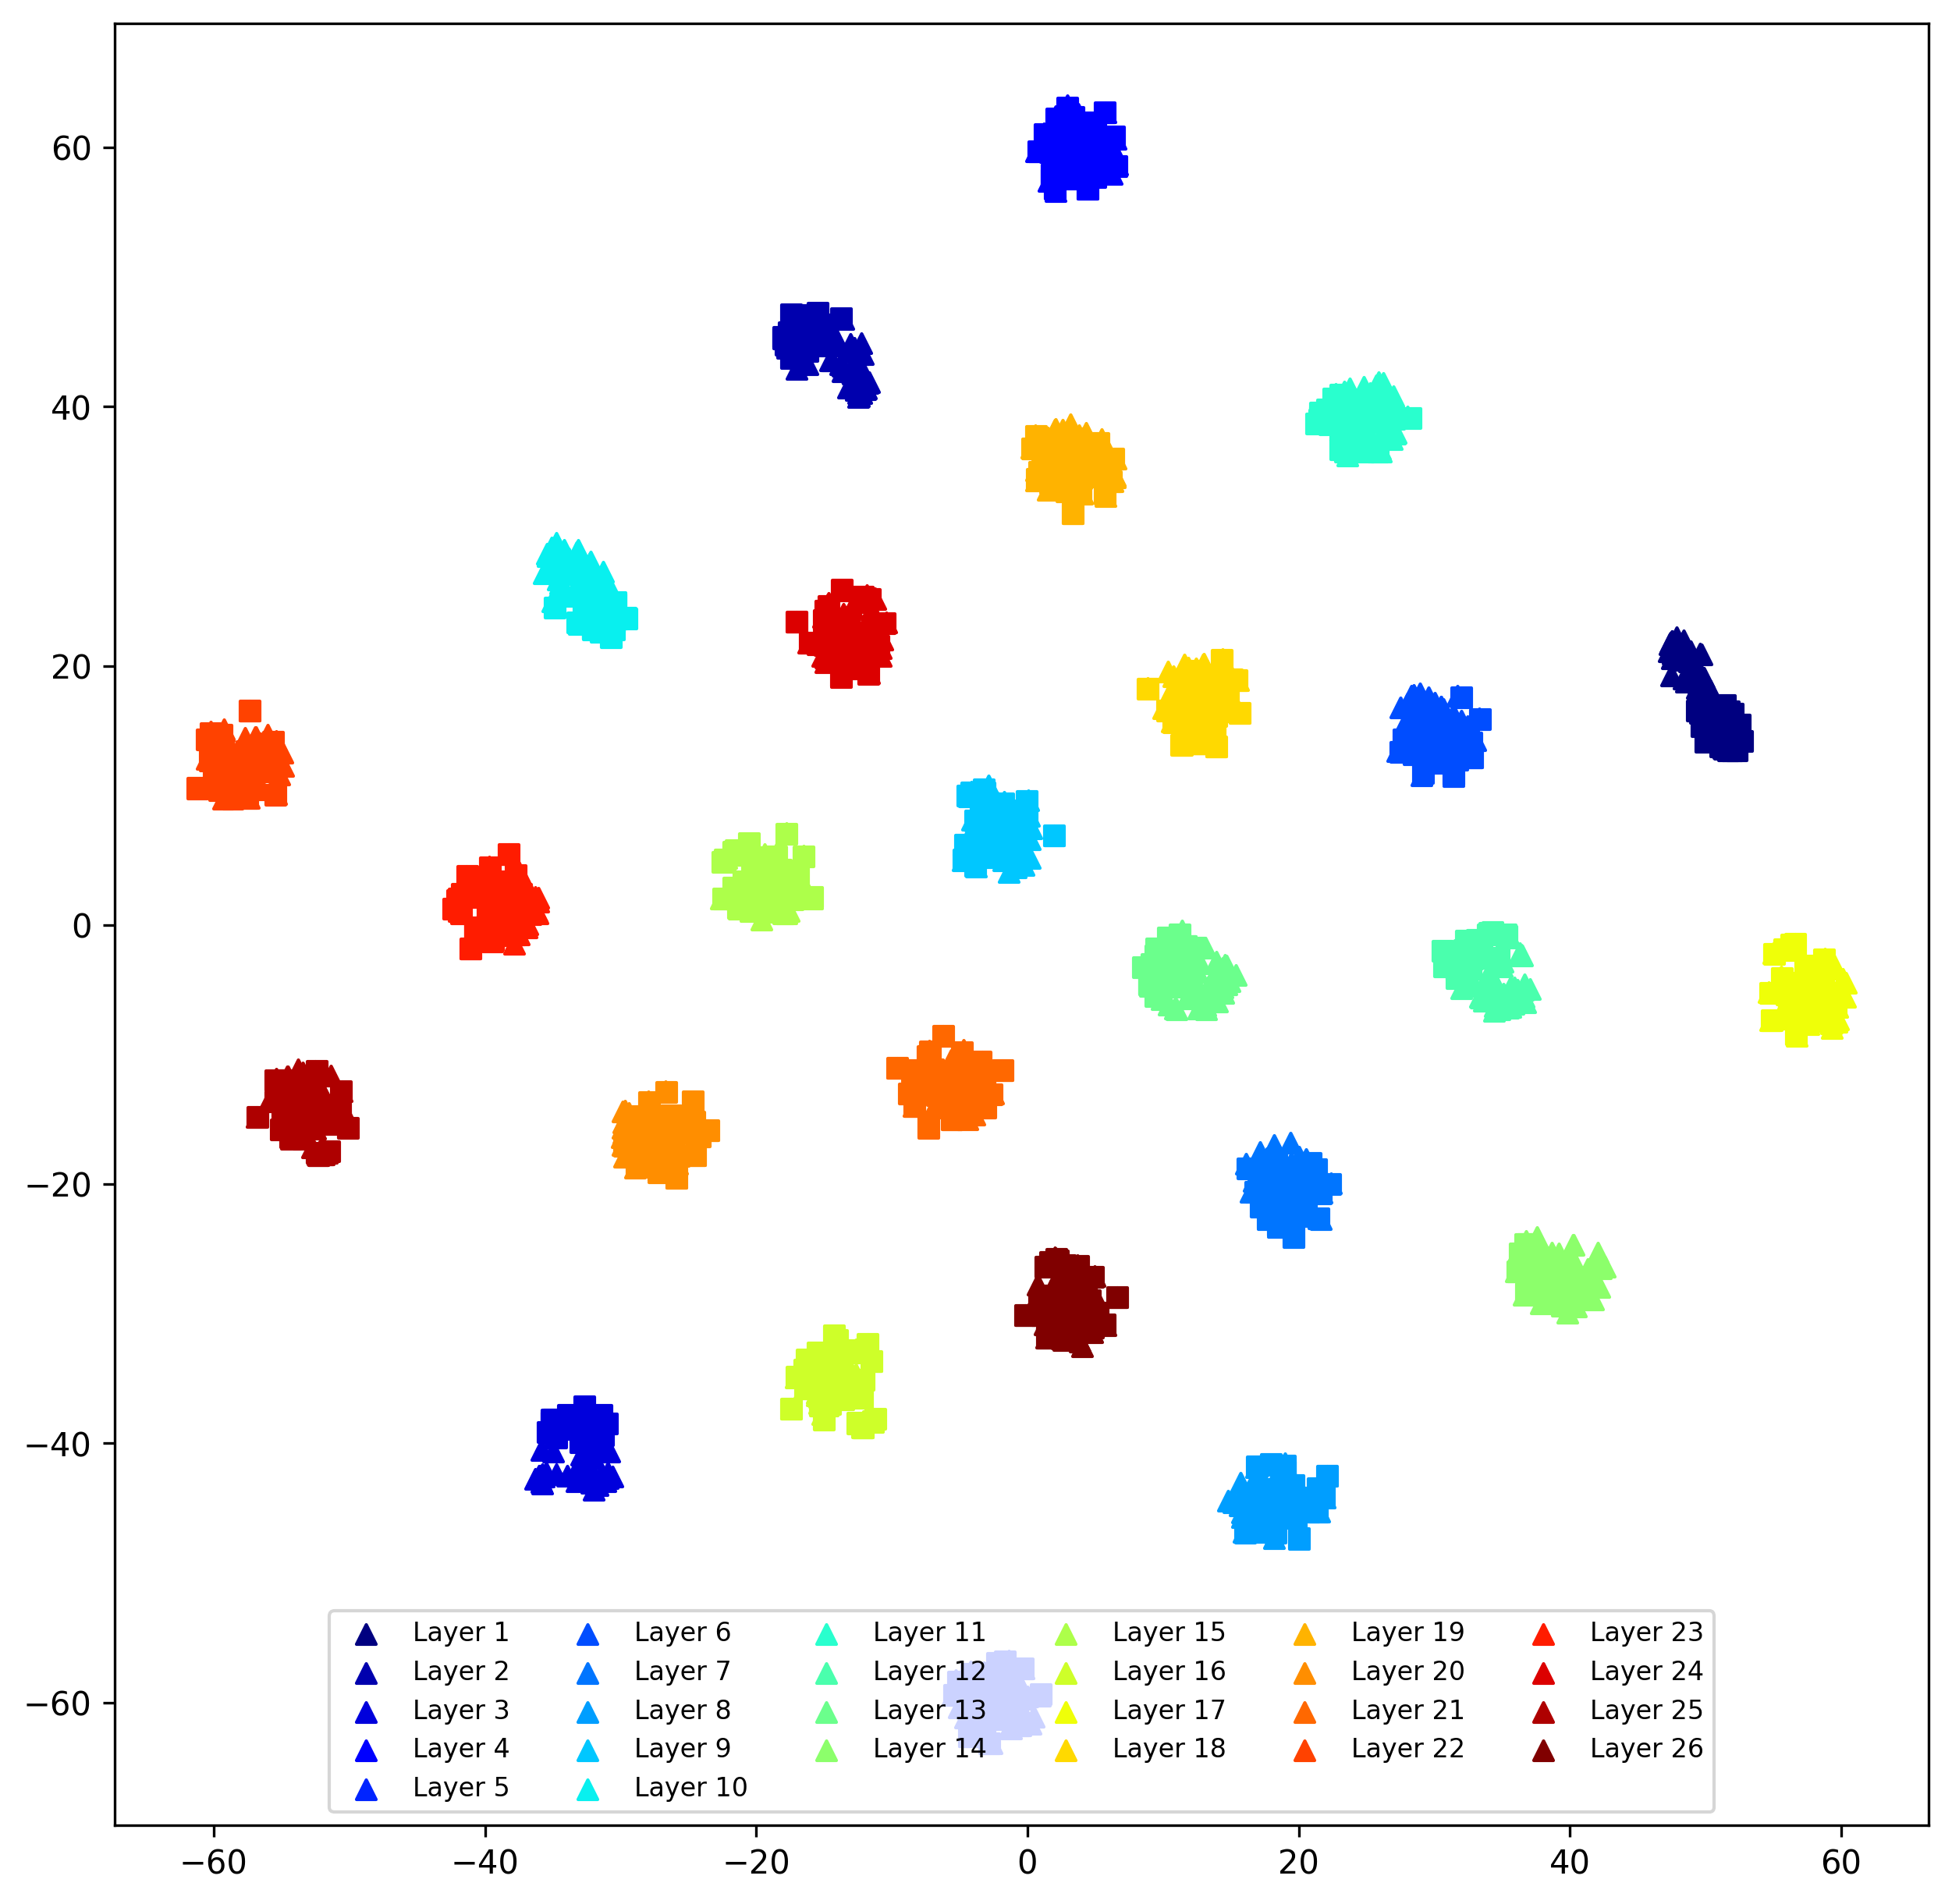

In [4]:
embeddings = activations
list_of_arrays = []
cmap = plt.cm.get_cmap('jet', 26)
colors = [cmap(i) for i in range(cmap.N)]
for j in range(embeddings.shape[1]):
    X_list = []
    for i in range(0,80):
        X1 = embeddings[i, j].reshape(1, -1) 
        X_list.append(X1)
        X = np.concatenate(X_list, axis=0) #(40,4096)
    list_of_arrays.append(X)
data = np.array(list_of_arrays)
# 调整数据形状为 (1280, 4096)
data_reshape = data.reshape(-1, data.shape[-1])
norms = np.linalg.norm(data_reshape, axis=1, keepdims=True)
normalized_embeddings = data_reshape / norms
# 初始化一个 t-SNE 模型
model = TSNE(n_components=2, random_state=0)
# 执行 t-SNE 算法，获取降维后的数据
tsne_data = model.fit_transform(normalized_embeddings)
# 创建一个颜色映射
#colors = cm.rainbow(np.linspace(0, 1, 26))
plt.figure(figsize=(10, 10),dpi=300)
# 对每一层的数据绘制散点图
scatter_plots = [] 
for i in range(data.shape[0]):
    # 获取该层数据的索引范围
    startIdx = i * data.shape[1]
    endIdx = (i + 1) * data.shape[1]
    # 绘制散点图，使用不同颜色
    list1 = tsne_data[startIdx:endIdx, 0]
    list2 = tsne_data[startIdx:endIdx, 1]
    even_indexed_1 = list1[::2]
    even_indexed_2 = list2[::2]
    odd_indexed_1 = list1[1::2]
    odd_indexed_2 = list2[1::2]
    scatter_plot = plt.scatter(even_indexed_1, even_indexed_2, color=colors[i],marker='s')
    scatter_plot = plt.scatter(odd_indexed_1, odd_indexed_2, color=colors[i],marker='^')
    scatter_plots.append(scatter_plot)
plt.legend(tuple(scatter_plots),
           ('Layer {}'.format(i+1) for i in range(data.shape[0])),
           scatterpoints=1,
           loc='lower center',
           ncol=6,
           fontsize=8)
#plt.show()
plt.savefig('2.png', format='png', dpi=600)

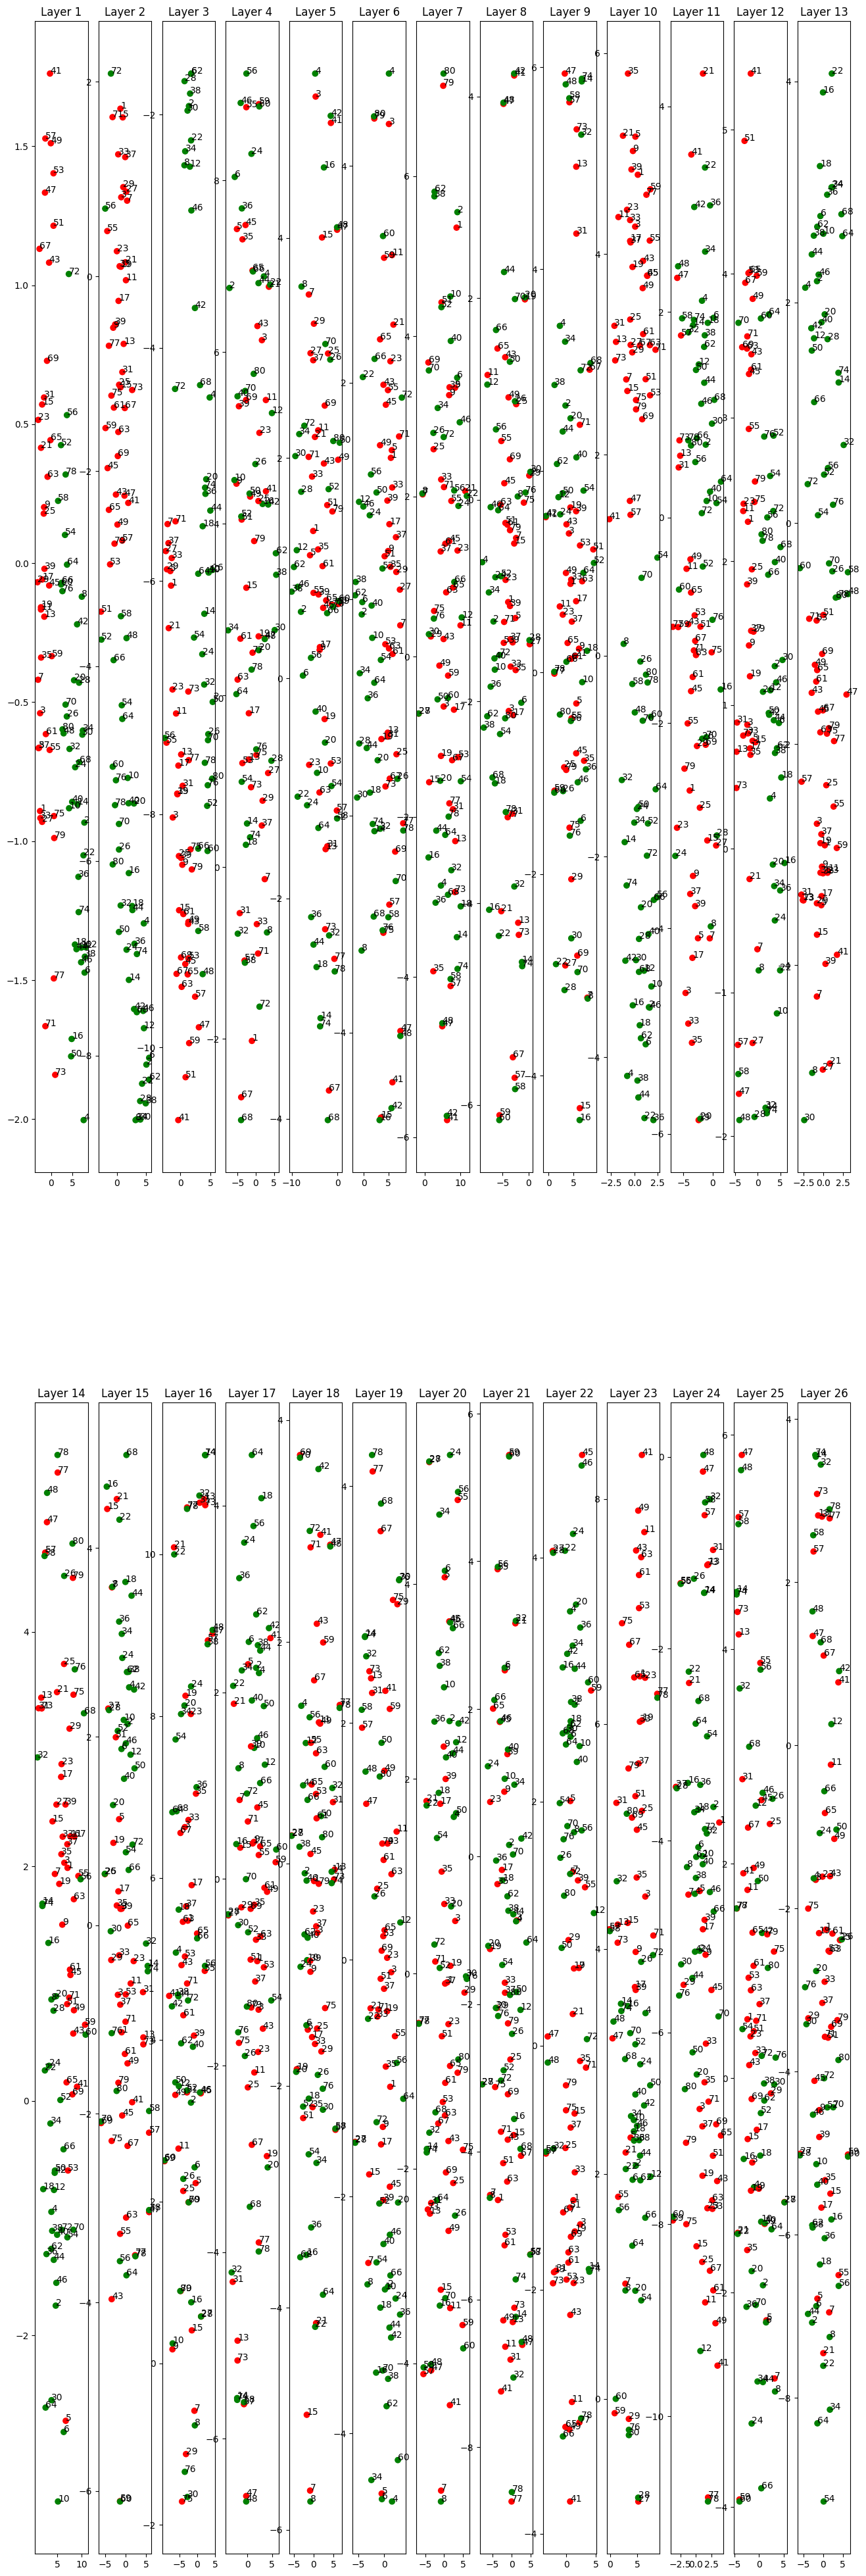

In [5]:
embeddings = activations
fig, axs = plt.subplots(2, 13, figsize=(16,50)) 
axs = axs.ravel() 
for j in range(embeddings.shape[1]):
    X_list = []
    for i in range(0,80):
        X1 = embeddings[i, j].reshape(1, -1) 
        X_list.append(X1)
        X = np.concatenate(X_list, axis=0) #(40,3200)
    norms = np.linalg.norm(X, axis=1, keepdims=True)
    normalized_embeddings = X/ norms
    colors = ['r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g',
    'r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g',
    'r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g',
    'r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g','r','g']
    tsne = TSNE(n_components=2)  
    X_tsne = tsne.fit_transform(X)  
    axs[j].scatter(X_tsne[:, 0], X_tsne[:, 1], color=colors) 
    axs[j].set_title(f'Layer {j + 1}') 
    for i in range(80):
            axs[j].text(X_tsne[i,0], X_tsne[i,1], str(i+1))
#plt.show()
plt.savefig('1.png', format='png', dpi=600)